In [237]:
# Imports 
import csv
import os

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [238]:
# Funções

# Essa função verifica se já existe um arquivo chamado df_valorado*index*. Assim sempre salva como df_valorado_1, df_valorado_2, etc.
def checkIfFileExists():
    index = 1
    exists = True
    newFileName = ''
    while (exists == True):
        exists = os.path.exists(f'./df_valorado/df_valorado_{index}.csv')
        if (exists == True):
             index += 1
        else:
            newFileName = f'./df_valorado/df_valorado_{index}.csv'
    return newFileName
# --------------------

# Essa função procura e retorna o texto entre duas strings/caracteres dentro de uma string.
# Pode ser usada para, por exemplo, retornar o texto que esteja dentro de aspas ""
def find_between(string, first, last):
    # Exemplo -> 
    try:
        start = string.index(first) + len(first)
        end = string.index(last, start)
        return string[start:end]
    except ValueError:
        return ""
# --------------------

In [239]:
# Apagar se o arquivo existe:
# if os.path.exists('tweets.csv'):
#     os.remove('tweets.csv')
if os.path.exists('tweets-novembro.csv'):
    os.remove('tweets-novembro.csv')
# --------------------

# Abre o arquivo tweets:
# with open('tweets.txt', encoding='utf-8') as txt_file:
with open('tweets-novembro.txt', encoding='utf-8') as txt_file:
    # Lê todas as linhas do .txt dos tweets
    lines = txt_file.readlines()
    # Percorre todas as linhas do .txt e elimina as linhas que não possuem texto
    for index, line in enumerate(lines):
        if (not line.__len__() >= 2):
            lines.pop(index)
        
    # Abre o arquivo onde será salvo um tweet por linha
    # with open('tweets.csv', 'w', encoding='utf-8') as csv_parsed:
    with open('tweets-novembro.csv', 'w', encoding='utf-8') as csv_parsed:
        writer = csv.writer(csv_parsed)

        length = len(lines)
        index = 0
        all_lines = ['']

        # O código a seguir funciona da seguinte maneira:
        # A cada loop, ele lê a linha_atual (current_line), a proxima_primeira_linha (next_first_line), a proxima_segunda_linha (next_second_line), até a proxima_setima_linha.
        # Assim o código lida com o caso onde um tweet possui quebras de linha, e ocupa mais de uma linha.
        # O código procura pelo caractere ';' no final de cada linha, que é o limitador do final do texto de um tweet.
        # Assim, a cada loop, ao ler as próximas 8 linhas, ele define em qual linha o tweet termina, e copia todo esse texto para a string_final (final_line)
        # No final, verifica se todas as linhas atuais estão vazias, e se positivo, encerra o loop.

        umaVez = False
        while (index <= length):
            if (index >= 2000):
                break
            
            final_line = ''
            
            # print(f'index: {index}')
            try:
                current_line = lines[index].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                current_line = ''

            # print(current_line)

            try:
                next_first_line = lines[index + 1].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_first_line = ''

            try:
                next_second_line = lines[index + 2].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_second_line = ''

            try:
                next_third_line = lines[index + 3].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_third_line = ''

            try:
                next_fourth_line = lines[index + 4].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fourth_line = ''

            try:
                next_fifth_line = lines[index + 5].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fifth_line = ''

            try:
                next_sixth_line = lines[index + 6].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_sixth_line = ''

            try:
                next_seventh_line = lines[index + 7].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_seventh_line = ''

            try:
                next_eighth_line = lines[index + 8].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_eighth_line = ''

            try:
                next_nineth_line = lines[index + 9].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_nineth_line = ''

            try:
                next_tenth_line = lines[index + 10].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_tenth_line = ''

            try:
                next_eleventh_line = lines[index + 11].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_eleventh_line = ''

            try:
                next_twelfth_line = lines[index + 12].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_twelfth_line = ''

            try:
                next_thirteenth_line = lines[index + 13].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_thirteenth_line = ''

            try:
                next_fourteenth_line = lines[index + 14].rstrip()
            except Exception as e:
                # print(f'Error: {e}')
                next_fourteenth_line = ''

            final_line = ''
            
            # if (index >= 600 and umaVez == False):
            #     if (index == 8000):
            #         umaVez = True
                    
            #     print(f'---------current_line----------- {current_line}')
            #     print(f'---------next_first_line----------- {next_first_line}')
            #     print(f'---------next_second_line----------- {next_second_line}')
            #     print(f'---------next_third_line----------- {next_third_line}')
            #     print(f'---------next_fourth_line----------- {next_fourth_line}')
            #     # print(f'---------next_fifth_line----------- {next_fifth_line}')
            #     # print(f'---------next_sixth_line----------- {next_sixth_line}')
            #     # print(f'---------next_seventh_line----------- {next_seventh_line}')
            #     # print(f'---------next_eighth_line----------- {next_eighth_line}')
            #     # print(f'---------next_nineth_line----------- {next_nineth_line}')
            #     # print(f'---------next_tenth_line----------- {next_tenth_line}')
            #     # print(f'---------next_eleventh_line----------- {next_eleventh_line}')
            #     # print(f'---------next_twelfth_line----------- {next_twelfth_line}')
            #     # print(f'---------next_thirteenth_line----------- {next_thirteenth_line}')
            #     # print(f'---------next_fourteenth_line----------- {next_fourteenth_line}')
            
            if (current_line.endswith(';')):
                final_line = current_line
                index = index + 1
            elif (next_first_line.endswith(';')):
                final_line = f'{current_line} {next_first_line}'
                index = index + 2
            elif (next_second_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line}'
                index = index + 3
            elif (next_third_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line}'
                index = index + 4
            elif (next_fourth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line}'
                index = index + 5
            elif (next_fifth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line}'
                index = index + 6
            elif (next_sixth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line}'
                index = index + 7
            elif (next_seventh_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line}'
                index = index + 8
            elif (next_eighth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line}'
                index = index + 9
            elif (next_nineth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line}'
                index = index + 10
            elif (next_tenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line}'
                index = index + 11
            elif (next_eleventh_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line}'
                index = index + 12
            elif (next_twelfth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line}'
                index = index + 13
            elif (next_thirteenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line} {next_thirteenth_line}'
                index = index + 14
            elif (next_fourteenth_line.endswith(';')):
                final_line = f'{current_line} {next_first_line} {next_second_line} {next_third_line} {next_fourth_line} {next_fifth_line} {next_sixth_line} {next_seventh_line} {next_eighth_line} {next_nineth_line} {next_tenth_line} {next_eleventh_line} {next_twelfth_line} {next_thirteenth_line} {next_fourteenth_line}'
                index = index + 15

            if len(final_line) > 2:
                all_lines.append(f'{final_line}')
            
            # print(f'final_line: {final_line}')
            # print(f'index: {index}')

            if (final_line == '' 
                and next_first_line == '' 
                and next_second_line == '' 
                and next_third_line == '' 
                and next_fourth_line == '' 
                and next_fifth_line == '' 
                and next_sixth_line == '' 
                and next_seventh_line == ''
                and next_eighth_line == ''
                and next_nineth_line == ''
                and next_tenth_line == ''
                and next_eleventh_line == ''
                and next_twelfth_line == ''
                and next_thirteenth_line == ''
                and next_fourteenth_line == ''
            ):
                break
        # ---- while
        
        all_lines.pop(0)
        # Remove o primeiro elemento vazio inserido na hora da inicialização
        
        writer = csv.writer(csv_parsed)
        
        # Percorre todas as linhas preparadas para salvar no .csv
        # print(f'allLines: {all_lines}')
        indice = 1
        for line in all_lines:
            # text_between_double_quotes = find_between(line, '"', '"')
            # if text_between_double_quotes != '':
            #     line = line.replace(text_between_double_quotes, f'"{text_between_double_quotes}"')

            # Remove os números iniciais de cada linha ('1-', '2-', '3-', etc)
            tweet_index = f'{indice}-'
            if line.startswith(tweet_index):
                line = line.replace(tweet_index, '')

            # Remove o ';' do final de cada linha
            if line.endswith(';'):
                line = line[:-1]

            # Substitui a linha no array pela linha modificada
            all_lines[indice - 1] = line
            line_for_csv = [line]
            
            # Escreve a linha modificada no .csv
            # csv_parsed.write(f'{line}\n')
            writer.writerow(line_for_csv)
            # print(line_for_csv)
            
            indice += 1
        # print(all_lines)
        with open('tweets.csv', encoding='utf-8') as twts:
            df_temp = pd.DataFrame(twts)
            
# --------------------

In [240]:
# Criação do dataframe:

# Lê o .csv do qual deverá ser feito os cálculos
# df = pd.read_csv('tweets.csv', encoding='utf-8', on_bad_lines='skip')
df = pd.read_csv('tweets-novembro.csv', encoding='utf-8', on_bad_lines='skip')
# df = pd.read_csv('./kmeans_manual/3ª Avaliação/2-2-1.csv', sep=';', index_col=0)

df = df.drop_duplicates()
# df_csv = df.to_csv('tweets_drop_duplicates.csv')
# --------------------

In [241]:
# Montando array a partir do df
df_array = []
for dados in df.to_numpy():
    for tweet in dados:
        df_array.append(tweet)

cv = CountVectorizer()

In [242]:
# Realização do TF:
word_count_vector = cv.fit_transform(df_array)
tf = word_count_vector.toarray()
df_tf = pd.DataFrame(data = tf, columns = cv.get_feature_names_out())
# df_tf.to_csv('./TF-IDF - CSV/tf.csv', index = False, sep = ';')
df_tf.to_csv('./TF-IDF - CSV - Novembro/tf.csv', index = False, sep = ';')
 ## print(f'TF:\n{df_tf}\n\n-------------------')
# --------------------

In [243]:
# Realização do TF-IDF:
tf_idf_vectorizer = TfidfVectorizer()
X = tf_idf_vectorizer.fit_transform(df_array)
feature_names = tf_idf_vectorizer.get_feature_names_out()
x_array = X.toarray()
df_tf_idf = pd.DataFrame(data = x_array, columns = feature_names)
# df_tf_idf.to_csv('./TF-IDF - CSV/tf_idf.csv', index = False, sep = ';')
df_tf_idf.to_csv('./TF-IDF - CSV - Novembro/tf_idf.csv', index = False, sep = ';')
## print(f'TF-IDF:\n{df_tf_idf}\n\n-------------------')
# --------------------

In [244]:
# Realização do IDF:
df_idf = df_tf_idf / df_tf
df_idf = df_idf.fillna(0)
# df_idf.to_csv('./TF-IDF - CSV/idf.csv', index = False, sep = ';')
df_idf.to_csv('./TF-IDF - CSV - Novembro/idf.csv', index = False, sep = ';')
## print(f'IDF:\n{df_idf}\n\n-------------------')
#--------------------

In [245]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# export_separate_data()

line_for_csv = kmeans.predict(tf_idf_vectorizer.transform(df_array))
# print(f'K-MEANS:\n{line_for_csv}\n\n-------------------')


df_valorado = pd.DataFrame(data = {'Texto': df_array, 'Valor': line_for_csv})
# df_valorado = df_valorado.sort_values(by=['Valor'])
df_valorado = df_valorado.reset_index(drop=True)
# print(f'df_valorado:\n{df_valorado}\n\n-------------------')

In [246]:
# Exportar os tweets valorados
df_valorado_classificado = df_valorado
array_classificacoes = []
for row in df_valorado_classificado.index:
    if df_valorado_classificado['Valor'][row] == 0:
        array_classificacoes.append('Neutro')
    elif df_valorado_classificado['Valor'][row] == 1:
        array_classificacoes.append('Positivo')
    elif df_valorado_classificado['Valor'][row] == 2:
        array_classificacoes.append('Negativo')

df_valorado_classificado = df_valorado_classificado.drop(columns=['Valor'])
df_valorado_classificado.insert(1, 'Classificação', array_classificacoes, allow_duplicates = True)

# df_valorado.to_csv(checkIfFileExists(), sep = ';', index = True)
# df_valorado_classificado.to_csv('df_valorado_classificado.csv', sep = ';', index = True)
df_valorado_classificado.to_csv('df_valorado_classificado-novembro.csv', sep = ';', index = True)
# --------------------

In [247]:
df_add_column = pd.DataFrame(data = df.values, columns=['Tweets'])

In [248]:
# Gerando o TF com as classificações
df_tf_csv = pd.concat([df_add_column, df_tf], axis=1)
df_tf_csv['Classificação'] = df_valorado_classificado.Classificação
# df_tf_csv.to_csv('df_tf_classificado.csv', sep = ';', index = False)
df_tf_csv.to_csv('df_tf_classificado - novembro.csv', sep = ';', index = False)

In [249]:
# Gerando o IDF com as classificações
df_idf_csv = pd.concat([df_add_column, df_idf], axis=1)
df_idf_csv['Classificação'] = df_valorado_classificado.Classificação
# df_idf_csv.to_csv('df_idf_classificado.csv', sep = ';', index = False)
df_idf_csv.to_csv('df_idf_classificado - novembro.csv', sep = ';', index = False)

In [250]:
# Gerando o TF-IDF com as classificações
df_tf_idf_csv = pd.concat([df_add_column, df_tf_idf], axis=1)
# df_tf_idf_csv = df_tf_idf_csv.reset_index()
# df_tf_idf_csv = df_tf_idf_csv.drop(columns=['index'])
df_tf_idf_csv["Classificação"] = df_valorado_classificado.Classificação
# print(f'df_tf_idf_csv: --------------- \n\n {df_tf_idf_csv}')
# df_tf_idf_csv.to_csv('df_tf_idf_classificado.csv', sep = ';', index = False)
df_tf_idf_csv.to_csv('df_tf_idf_classificado - novembro.csv', sep = ';', index = False)
# df_tf_idf_csv.head()
# --------------------

# C3

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
# Decision Tree (DT)
# kNN
# Rocchio
# Naive Bayes
# Support Vector Machine (SVM)

In [253]:
df_tf_csv.head()

,Tweets,000,01,02,04,10,100,108,11,12,...,índices,ódio,ótimo,ômicron,ônibus,última,último,últimos,único,Classificação
0,A nova ideia genial de Bolsonaro: cancelar urn...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivo
1,Resumindo: a lei exige que todas as urnas seja...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutro
2,ATENÇÃO: Apesar da contestação do PL e do futu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neutro
3,URGENTE! O Governo Bolsonaro bloqueia mais R$ ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativo
4,Relatório de auditoria das urnas aponta Bolson...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivo


In [254]:
df_tf_dados = df_tf_csv
df_tf_dados = df_tf_dados.drop(columns = 'Tweets', inplace = False)
print(df_tf_dados.head())

df_idf_dados = df_idf_csv
df_idf_dados = df_idf_dados.drop(columns = 'Tweets', inplace = False)
print(df_idf_dados.head())

df_tf_idf_dados = df_tf_idf_csv
df_tf_idf_dados = df_tf_idf_dados.drop(columns = 'Tweets', inplace = False)
print(df_tf_idf_dados.head())

   000  01  02  04  10  100  108  11  12  13  ...  índices  ódio  ótimo  \
0    0   0   0   0   0    0    0   0   0   0  ...        0     0      0   
1    0   0   0   0   0    0    0   0   0   0  ...        0     0      0   
2    0   0   0   0   0    0    0   0   0   0  ...        0     0      0   
3    0   0   0   0   0    0    0   0   0   0  ...        0     0      0   
4    0   0   0   0   0    0    0   0   0   0  ...        0     0      0   

   ômicron  ônibus  última  último  últimos  único  Classificação  
0        0       0       0       0        0      0       Positivo  
1        0       0       0       0        0      0         Neutro  
2        0       0       0       0        0      0         Neutro  
3        0       0       0       0        0      0       Negativo  
4        0       0       0       0        0      0       Positivo  

[5 rows x 2583 columns]
   000   01   02   04   10  100  108   11   12   13  ...  índices  ódio  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix , classification_report
import scikitplot as skplt

# Naive Bayes

Valores usados no Teste
['Neutro' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo' 'Negativo'
 'Negativo' 'Neutro' 'Positivo' 'Negativo' 'Negativo' 'Negativo'
 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Negativo' 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo'
 'Negativo' 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Neutro' 'Negativo' 'Positivo' 'Neutro' 'Positivo' 'Negativo' 'Neutro'
 'Neutro' 'Neutro' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Negativo'
 'Negativo' 'Positivo' 'Neutro' 'Negativo' 'Neutro' 'Positivo' 'Negativo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo']
---------------------
Valores previstos
['Neutro' 'Neutro' 'Neutro' 'Negati

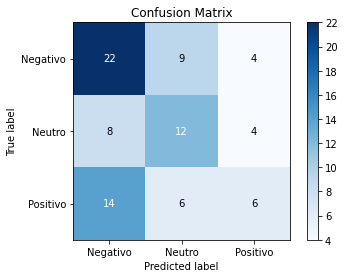

In [256]:
# TF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_tf = df_tf_dados.iloc[:, 0:-1].values
# X_tf[0].shape -> 3715

# Seleciona todas as linhas, apenas da última coluna
y_tf = df_tf_dados.iloc[:, -1].values
# Y_tf.shape -> 569

# Train-Test Split
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size = 0.30, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_tf_train = sc.fit_transform(X_tf_train)
X_tf_test = sc.fit_transform(X_tf_test)

# Naive-Bayes
naive = GaussianNB()
naive.fit(X_tf_train, y_tf_train)

# TF - Predição
y_tf_pred = naive.predict(X_tf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_tf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_tf_pred)
print('---------------------')

# Confusion Matrix do TF
cm = skplt.metrics.plot_confusion_matrix(y_tf_test, y_tf_pred)

# Métricas dos resultados
print('Métricas dos resultados')
print(classification_report(y_tf_test, y_tf_pred))

print('Confusion Matrix: ')
print(cm)
print('---------------------')


Valores usados no Teste
['Neutro' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo' 'Negativo'
 'Negativo' 'Neutro' 'Positivo' 'Negativo' 'Negativo' 'Negativo'
 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Negativo' 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo'
 'Negativo' 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Neutro' 'Negativo' 'Positivo' 'Neutro' 'Positivo' 'Negativo' 'Neutro'
 'Neutro' 'Neutro' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Negativo'
 'Negativo' 'Positivo' 'Neutro' 'Negativo' 'Neutro' 'Positivo' 'Negativo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo']
---------------------
Valores previstos
['Neutro' 'Neutro' 'Positivo' 'Nega

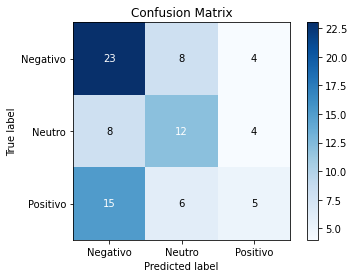

In [257]:
# IDF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_idf = df_tf_idf_dados.iloc[:, 0:-1].values
# X_idf[0].shape -> 2582

# Seleciona todas as linhas, apenas da última coluna
y_idf = df_tf_idf_dados.iloc[:, -1].values
# y_idf.shape -> 281

# Train-Test Split
X_idf_train, X_idf_test, y_idf_train, y_idf_test = train_test_split(X_idf, y_idf, test_size = 0.30, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_idf_train = sc.fit_transform(X_idf_train)
X_idf_test = sc.fit_transform(X_idf_test)

# Naive-Bayes
naive = GaussianNB()
naive.fit(X_idf_train, y_idf_train)

# TF - Predição
y_idf_pred = naive.predict(X_idf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_idf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_idf_pred)
print('---------------------')

# Confusion Matrix do IDF
cm = skplt.metrics.plot_confusion_matrix(y_idf_test, y_idf_pred)

# Métricas dos resultados
print('Métricas dos resultados')
print(classification_report(y_idf_test, y_idf_pred))

print('Confusion Matrix: ')
print(cm)
print('---------------------')


(281, 2582)
(281,)
Valores usados no Teste
['Neutro' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo' 'Negativo'
 'Negativo' 'Neutro' 'Positivo' 'Negativo' 'Negativo' 'Negativo'
 'Negativo' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Negativo' 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Positivo'
 'Neutro' 'Neutro' 'Positivo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Positivo' 'Positivo'
 'Negativo' 'Neutro' 'Negativo' 'Positivo' 'Negativo' 'Positivo' 'Neutro'
 'Neutro' 'Negativo' 'Positivo' 'Neutro' 'Positivo' 'Negativo' 'Neutro'
 'Neutro' 'Neutro' 'Negativo' 'Negativo' 'Positivo' 'Neutro' 'Negativo'
 'Negativo' 'Neutro' 'Negativo' 'Negativo' 'Negativo' 'Neutro' 'Negativo'
 'Negativo' 'Positivo' 'Neutro' 'Negativo' 'Neutro' 'Positivo' 'Negativo'
 'Neutro' 'Positivo' 'Positivo' 'Positivo' 'Negativo']
---------------------
Valores previstos
['Neutro' 'Neutr

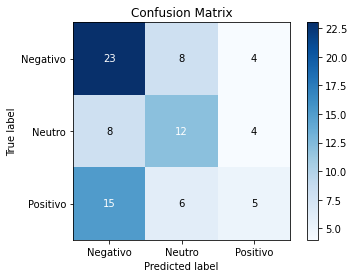

In [258]:
# TF-IDF

# Seleciona todas as linhas, de todas as colunas, exceto a última
X_tf_idf = df_tf_idf_dados.iloc[:, 0:-1].values
print(X_tf_idf.shape)
# X_idf[0].shape -> 2582

# Seleciona todas as linhas, apenas da última coluna
y_tf_idf = df_tf_idf_dados.iloc[:, -1].values
print(y_tf_idf.shape)
# y_idf.shape -> 281

# Train-Test Split
X_tf_idf_train, X_tf_idf_test, y_tf_idf_train, y_tf_idf_test = train_test_split(X_tf_idf, y_tf_idf, test_size = 0.30, random_state = 0)

# Fit-Transform
sc = StandardScaler()
X_tf_idf_train = sc.fit_transform(X_tf_idf_train)
X_tf_idf_test = sc.fit_transform(X_tf_idf_test)

# Naive-Bayes
naive = GaussianNB()
naive.fit(X_tf_idf_train, y_tf_idf_train)

# TF - Predição
y_tf_idf_pred = naive.predict(X_tf_idf_test)

# Valores para Teste
print('Valores usados no Teste')
print(y_tf_idf_test)
print('---------------------')

# Valores previstos
print('Valores previstos')
print(y_tf_idf_pred)
print('---------------------')

# Confusion Matrix do IDF
cm = skplt.metrics.plot_confusion_matrix(y_tf_idf_test, y_tf_idf_pred)

# Métricas dos resultados
print('Métricas dos resultados')
print(classification_report(y_tf_idf_test, y_tf_idf_pred))

print('Confusion Matrix: ')
print(cm)
print('---------------------')


In [259]:
# Referências
# https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/